
#  INT303 Big Data Analytics


##  Lab 9 Boosting

**XJTLU**<br>
**S1 2021**<br>
**Instructors:** Jia WANG <br>
**Lab Instructor:** Jia WANG <br>


**Outline** 
* Gradient Boosting

    * Impliment from scratch
    * Use sklearn APIs
    * Tune the model
* Adaboost

    * A review of the Adaboost M1 algorithm and an intuitive visualization of its inner workings
    * An implementation from scratch in Python, using an Sklearn decision tree stump as the weak classifier
    * A discussion on the trade-off between the Learning rate and Number of weak classifiers parameters




# 1. Gradient Boosting 

![avatar](./gradientboosting.png)

## Start from scratch

In [17]:
# Import pandas and numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Silence warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_bikes = pd.read_csv('bike_rentals_cleaned.csv')
df_bikes.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,1600


In [4]:
# Split data into X and y
X_bikes = df_bikes.iloc[:,:-1]
y_bikes = df_bikes.iloc[:,-1]

# Import train_test_split
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_bikes, y_bikes, random_state=2)


In [5]:
# Import Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

# Initialize Decision Tree Regressor
tree_1 = DecisionTreeRegressor(max_depth=2, random_state=2)

# Fit tree to training data
tree_1.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=2, splitter='best')

In [6]:
# Make predictions on training set
y_train_pred = tree_1.predict(X_train)

In [7]:
# Compute residuals
y2_train = y_train - y_train_pred

# Initialize Decision Tree Regressor
tree_2 = DecisionTreeRegressor(max_depth=2, random_state=2)

# Fit tree to training data
tree_2.fit(X_train, y2_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=2, splitter='best')

In [8]:
# Make predictions on training set
y2_train_pred = tree_2.predict(X_train)

# Compute residuals
y3_train = y2_train - y2_train_pred

# Initialize Decision Tree Regressor
tree_3 = DecisionTreeRegressor(max_depth=2, random_state=2)

# Fit tree to training data
tree_3.fit(X_train, y3_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=2, splitter='best')

In [9]:
y1_pred = tree_1.predict(X_test)

y2_pred = tree_2.predict(X_test)

y3_pred = tree_3.predict(X_test)

y_pred = y1_pred + y2_pred + y3_pred

# Import mean_squared_error 
from sklearn.metrics import mean_squared_error as MSE

# Compute root mean squared error (rmse)
MSE(y_test, y_pred)**0.5

911.0479538776444

## Use sklearn APIs

In [10]:
from sklearn.ensemble import GradientBoostingRegressor

In [11]:
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=3, random_state=2, learning_rate=1.0)

gbr.fit(X_train, y_train)

# Predict test data
y_pred = gbr.predict(X_test)

# Compute root mean squared error (rmse)
MSE(y_test, y_pred)**0.5

911.047953877644

In [12]:
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=30, random_state=2, learning_rate=1.0)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
MSE(y_test, y_pred)**0.5

857.1072323426941

In [13]:
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=300, random_state=2, learning_rate=1.0)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
MSE(y_test, y_pred)**0.5

940.3485971740937

In [14]:
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=300, random_state=2)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
MSE(y_test, y_pred)**0.5

653.7163948305487

## Model Tunning

* learning_rate_values
* n_estimators_:The number of estimators as selected by early stopping.
* depths: The maximum depth limits the number of nodes in the tree. 
* Subsample: The fraction of samples to be used for fitting the individual base learners. 


Learning Rate: 0.001 , Score: 1633.0261400367253
Learning Rate: 0.01 , Score: 831.5430182728547
Learning Rate: 0.05 , Score: 685.0192988749716
Learning Rate: 0.1 , Score: 653.7163948305487
Learning Rate: 0.15 , Score: 686.5086427189519
Learning Rate: 0.2 , Score: 663.2234729857727
Learning Rate: 0.3 , Score: 686.3935975736948
Learning Rate: 0.5 , Score: 693.8856905068781
Learning Rate: 1.0 , Score: 940.3485971740937


Text(0, 0.5, 'MSE')

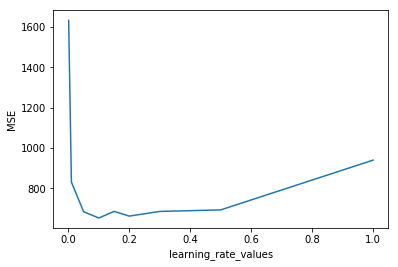

In [19]:
#learning_rate
learning_rate_values = [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5, 1.0]
score=[]
for value in learning_rate_values:
    gbr = GradientBoostingRegressor(max_depth=2, n_estimators=300, random_state=2, learning_rate=value)
    gbr.fit(X_train, y_train)
    y_pred = gbr.predict(X_test)
    rmse = MSE(y_test, y_pred)**0.5
    score.append(rmse)
    print('Learning Rate:', value, ', Score:', rmse)
plt.plot(learning_rate_values,score)
plt.xlabel('learning_rate_values')
plt.ylabel('MSE')
    

Learning Rate: 1.0 , Score: 867.7784711117861
Learning Rate: 1.0 , Score: 707.8261886858734
Learning Rate: 1.0 , Score: 653.7163948305487
Learning Rate: 1.0 , Score: 645.688476658105
Learning Rate: 1.0 , Score: 662.908145750769


Text(0, 0.5, 'MSE')

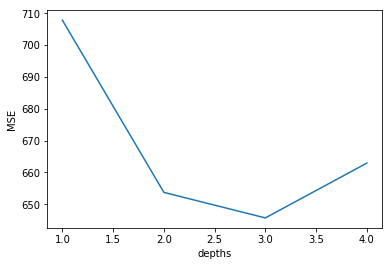

In [20]:
#depths
depths = [None, 1, 2, 3, 4]
score=[]
for depth in depths:
    gbr = GradientBoostingRegressor(max_depth=depth, n_estimators=300, random_state=2)
    gbr.fit(X_train, y_train)
    y_pred = gbr.predict(X_test)
    rmse = MSE(y_test, y_pred)**0.5
    score.append(rmse)
    print('Learning Rate:', value, ', Score:', rmse)
plt.plot(depths,score)
plt.xlabel('depths')
plt.ylabel('MSE')

Learning Rate: 1.0 , Score: 645.688476658105
Learning Rate: 1.0 , Score: 636.3695720397831
Learning Rate: 1.0 , Score: 615.4306761347029
Learning Rate: 1.0 , Score: 598.2674840118096
Learning Rate: 1.0 , Score: 634.5876651648031
Learning Rate: 1.0 , Score: 623.5973612721125


Text(0, 0.5, 'MSE')

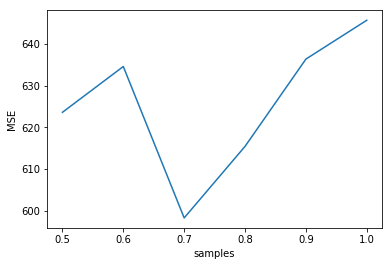

In [23]:
#samples
samples = [1, 0.9, 0.8, 0.7, 0.6, 0.5]
score=[]
for sample in samples:
    gbr = GradientBoostingRegressor(max_depth=3, n_estimators=300, subsample=sample, random_state=2)
    gbr.fit(X_train, y_train)
    y_pred = gbr.predict(X_test)
    rmse = MSE(y_test, y_pred)**0.5
    score.append(rmse)
    print('Learning Rate:', value, ', Score:', rmse)
plt.plot(samples,score)
plt.xlabel('samples')
plt.ylabel('MSE')

## Grid Search (Tuning the hyper-parameters of an estimator)

In [ ]:
params={'subsample':[0.65, 0.7, 0.75],
                          'n_estimators':[300, 500, 1000],
                          'learning_rate':[0.05, 0.075, 0.1]
                         }

# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

gbr = GradientBoostingRegressor(max_depth=3, random_state=2)


# Instantiate RandomizedSearchCV as rand_reg
rand_reg = RandomizedSearchCV(gbr, params, n_iter=10, scoring='neg_mean_squared_error', 
                              cv=5, n_jobs=-1, random_state=2)

# Fit grid_reg on X_train and y_train
rand_reg.fit(X_train, y_train)

# Extract best estimator
best_model = rand_reg.best_estimator_

# Extract best params
best_params = rand_reg.best_params_

# Print best params
print("Best params:", best_params)

# Compute best score
best_score = np.sqrt(-rand_reg.best_score_)

# Print best score
print("Training score: {:.3f}".format(best_score))

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
rmse_test = MSE(y_test, y_pred)**0.5

# Print rmse_test
print('Test set score: {:.3f}'.format(rmse_test))

# 2. AdaBoost
 
![avatar](./pic1.png) 
![image.png](./pic2.png)

In [42]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns
sns.set_style('white')

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier



In [43]:
#Toy Dataset
x1 = np.array([.1,.2,.4,.8, .8, .05,.08,.12,.33,.55,.66,.77,.88,.2,.3,.4,.5,.6,.25,.3,.5,.7,.6])
x2 = np.array([.2,.65,.7,.6, .3,.1,.4,.66,.77,.65,.68,.55,.44,.1,.3,.4,.3,.15,.15,.5,.55,.2,.4])
y = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1])
X = np.vstack((x1,x2)).T

def plot_decision_boundary(classifier, X, y, N = 10, scatter_weights = np.ones(len(y)) , ax = None ):
    '''Utility function to plot decision boundary and scatter plot of data'''
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid( np.linspace(x_min, x_max, N), np.linspace(y_min, y_max, N))

    
    #Check what methods are available
    if hasattr(classifier, "decision_function"):
        zz = np.array( [classifier.decision_function(np.array([xi,yi]).reshape(1,-1)) for  xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] )
    elif hasattr(classifier, "predict_proba"):
        zz = np.array( [classifier.predict_proba(np.array([xi,yi]).reshape(1,-1))[:,1] for  xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] )
    else :
        zz = np.array( [classifier(np.array([xi,yi]).reshape(1,-1)) for  xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] )
            
    # reshape result and plot
    Z = zz.reshape(xx.shape)
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    #Get current axis and plot
    if ax is None:
        ax = plt.gca()
    ax.contourf(xx, yy, Z, 2, cmap='RdBu', alpha=.5)
    ax.contour(xx, yy, Z,  2, cmap='RdBu')
    ax.scatter(X[:,0],X[:,1], c = y, cmap = cm_bright, s = scatter_weights * 40)
    ax.set_xlabel('$X_1$')
    ax.set_ylabel('$X_2$')

## Sklearn AdaBoost and decision boundary

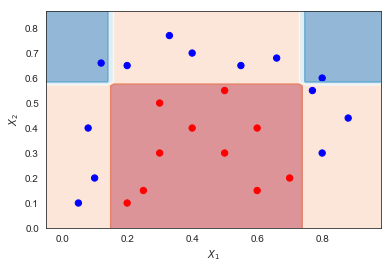

1.0

In [44]:
boost = AdaBoostClassifier( base_estimator = DecisionTreeClassifier(max_depth = 1, max_leaf_nodes=2), 
                            algorithm = 'SAMME',n_estimators=10, learning_rate=1.0)
boost.fit(X,y)
plot_decision_boundary(boost, X,y, N = 50)#, weights)
plt.show()

boost.score(X,y)

## Python implementation

In [45]:
def AdaBoost_scratch(X,y, M=10, learning_rate = 1):
    #Initialization of utility variables
    N = len(y)
    estimator_list, y_predict_list, estimator_error_list, estimator_weight_list, sample_weight_list = [], [],[],[],[]

    #Initialize the sample weights
    sample_weight = np.ones(N) / N
    sample_weight_list.append(sample_weight.copy())

    #For m = 1 to M
    for m in range(M):   

        #Fit a classifier
        estimator = DecisionTreeClassifier(max_depth = 1, max_leaf_nodes=2)
        estimator.fit(X, y, sample_weight=sample_weight)
        y_predict = estimator.predict(X)

        #Misclassifications
        incorrect = (y_predict != y)

        #Estimator error
        estimator_error = np.mean( np.average(incorrect, weights=sample_weight, axis=0))
        
        #Boost estimator weights
        estimator_weight =  learning_rate * np.log((1. - estimator_error) / estimator_error)

        #Boost sample weights
        sample_weight *= np.exp(estimator_weight * incorrect * ((sample_weight > 0) | (estimator_weight < 0)))

        #Save iteration values
        estimator_list.append(estimator)
        y_predict_list.append(y_predict.copy())
        estimator_error_list.append(estimator_error.copy())
        estimator_weight_list.append(estimator_weight.copy())
        sample_weight_list.append(sample_weight.copy())
        


    #Convert to np array for convenience   
    estimator_list = np.asarray(estimator_list)
    y_predict_list = np.asarray(y_predict_list)
    estimator_error_list = np.asarray(estimator_error_list)
    estimator_weight_list = np.asarray(estimator_weight_list)
    sample_weight_list = np.asarray(sample_weight_list)

    #Predictions
    preds = (np.array([np.sign((y_predict_list[:,point] * estimator_weight_list).sum()) for point in range(N)]))
    print('Accuracy = ', (preds == y).sum() / N) 
    
    return estimator_list, estimator_weight_list, sample_weight_list

## Running scratch AdaBoost

In [46]:
estimator_list, estimator_weight_list, sample_weight_list  = AdaBoost_scratch(X,y, M=10, learning_rate = 1)

Accuracy =  1.0


## Adaboost_scratch Plotting utility function

In [47]:
def plot_AdaBoost_scratch_boundary(estimators,estimator_weights, X, y, N = 10,ax = None ):
    
    def AdaBoost_scratch_classify(x_temp, est,est_weights ):
        '''Return classification prediction for a given point X and a previously fitted AdaBoost'''
        temp_pred = np.asarray( [ (e.predict(x_temp)).T* w for e, w in zip(est,est_weights )]  ) / est_weights.sum()
        return np.sign(temp_pred.sum(axis = 0))
    
    
    '''Utility function to plot decision boundary and scatter plot of data'''
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid( np.linspace(x_min, x_max, N), np.linspace(y_min, y_max, N))


    zz = np.array( [AdaBoost_scratch_classify(np.array([xi,yi]).reshape(1,-1), estimators,estimator_weights ) for  xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] )
            
    # reshape result and plot
    Z = zz.reshape(xx.shape)
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    if ax is None:
        ax = plt.gca()
    ax.contourf(xx, yy, Z, 2, cmap='RdBu', alpha=.5)
    ax.contour(xx, yy, Z,  2, cmap='RdBu')
    ax.scatter(X[:,0],X[:,1], c = y, cmap = cm_bright)
    ax.set_xlabel('$X_1$')
    ax.set_ylabel('$X_2$')

## Plotting resulting decision boundary

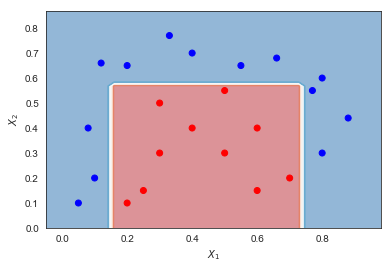

In [48]:
plot_AdaBoost_scratch_boundary(estimator_list, estimator_weight_list, X, y, N = 50 )

## Viewing decision boundaries of the weak classifiers inside AdaBoost

* M=10  iterations.
* Size of scatter points is proportional to scale of sample_weights.

* For example, in the top left plot m=0, 6 blue points are misclassified. In the next ieration m=1, their sample weight is increased and the scatter plot shows them as bigger.

Accuracy =  1.0


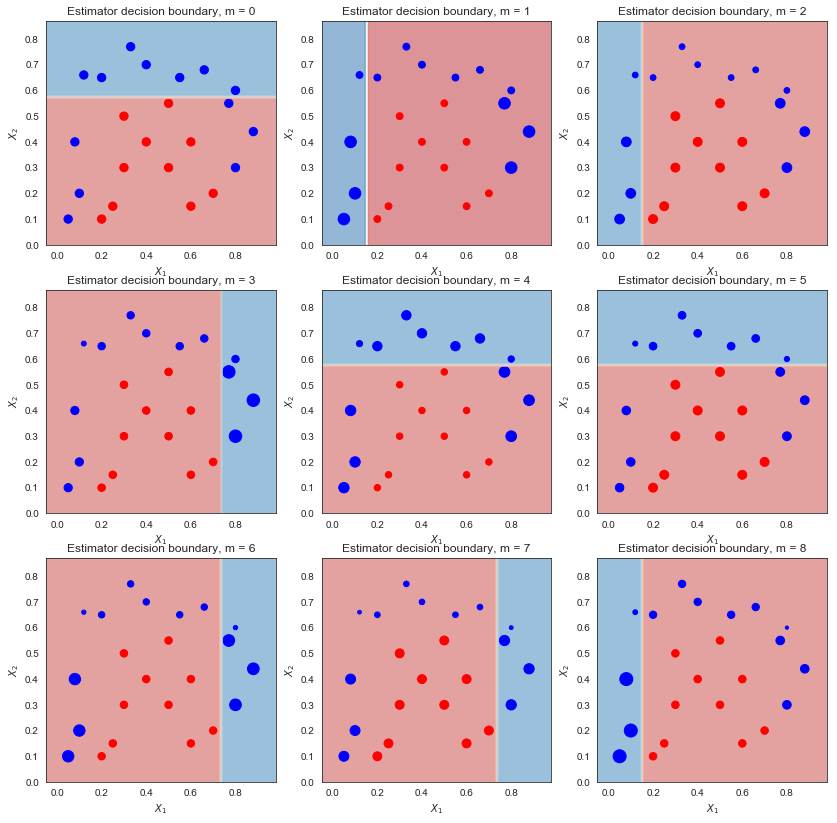

In [49]:
estimator_list, estimator_weight_list, sample_weight_list  = AdaBoost_scratch(X,y, M=10, learning_rate = 1)

fig = plt.figure(figsize = (14,14))
for m in range(0,9):
    fig.add_subplot(3,3,m+1)
    s_weights = (sample_weight_list[m,:] / sample_weight_list[m,:].sum() ) * 40
    plot_decision_boundary(estimator_list[m], X,y,N = 50, scatter_weights =s_weights )
    plt.title('Estimator decision boundary, m = {}'.format(m))

Accuracy =  0.7391304347826086
[0.10414539 0.09373085 0.08435776 0.07592199 0.06832979 0.06149681
 0.05534713 0.0549876  0.05308348 0.05268687]
Accuracy =  0.8695652173913043
[0.52072694 0.26823221 0.34353197 0.2425222  0.31806477 0.3092209
 0.31967048 0.29344342 0.25530824 0.30996101]
Accuracy =  1.0
[1.04145387 0.87546874 0.83739679 0.78053386 1.03993142 0.93832294
 0.62863165 0.8769354  0.77916076 1.05526061]
Accuracy =  0.7391304347826086
[1.04145387]
Accuracy =  0.8695652173913043
[1.04145387 0.87546874 0.83739679]
Accuracy =  1.0
[1.04145387 0.87546874 0.83739679 0.78053386 1.03993142 0.93832294
 0.62863165 0.8769354  0.77916076 1.05526061]


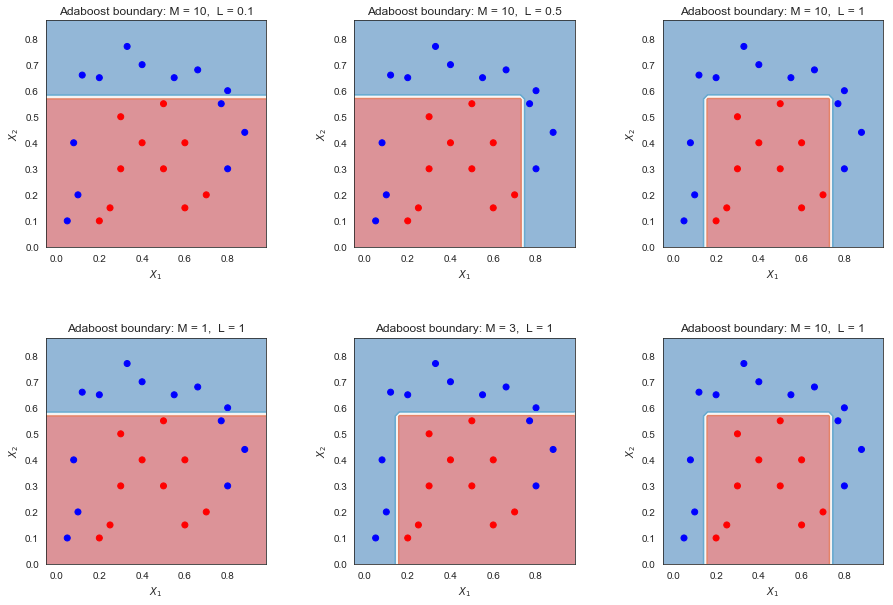

In [50]:
## The impact of Learning Rate L and the number of weak classifiers M
fig = plt.figure(figsize = (15,10))
for k,l in enumerate([0.1,0.5,1]):
    fig.add_subplot(2,3,k+1)
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    estimator_list, estimator_weight_list, sample_weight_list = AdaBoost_scratch(X,y, M=10, learning_rate = l)
    plot_AdaBoost_scratch_boundary(estimator_list,estimator_weight_list, X, y, N = 50,ax = None )
    plt.title('Adaboost boundary: M = 10,  L = {}'.format(l))
    print(estimator_weight_list)

for k,m in enumerate([1,3,10]):
    fig.add_subplot(2,3,k+4)
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    estimator_list, estimator_weight_list, sample_weight_list = AdaBoost_scratch(X,y, M=m, learning_rate = 1)
    plot_AdaBoost_scratch_boundary(estimator_list,estimator_weight_list, X, y, N = 50,ax = None )
    plt.title('Adaboost boundary: M = {},  L = 1'.format(m))
    print(estimator_weight_list)